In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from typing import List, Dict, Any
import sys
import pandas as pd
sys.path.append('..')
from wyscout.match import get_team_matches, get_match_details
from wyscout.stats import get_touches_for_player
from wyscout.competitions import get_competitions, get_competition_seasons
import seaborn as sns
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import numpy as np

In [3]:
NATIONAL_LEAGUE = 351

SOUTHEND = 1687
NOTTS_C = 1677
WREXHAM = 10530
BARNET = 1701
WEALDSTONE = 1833
BOREHAM_WOOD = 1917

SEASON_2022 = 188172
SEASON_2023 = 189051
SEASON_2024 = 190045

J_BRIDGE = 289901
S_HOBSON = 489434
C_POWELL = 444130
M_DAKERS = 601997
K_LOPATA = 592169
H_CARDWELL = 330285

In [20]:
matches = get_team_matches(SOUTHEND, SEASON_2023)
for m in matches["matches"]:
    print(m["matchId"], m["date"], m["label"])

match_id = matches["matches"][0]["matchId"]
team_id = SOUTHEND 
season = SEASON_2023

5490755 2023-12-02 16:00:00 Southend United - Wealdstone, 0-0
5490764 2023-11-25 16:00:00 Gateshead - Southend United, 1-1
5490743 2023-11-18 16:00:00 Southend United - Chesterfield, 2-1
5490724 2023-11-11 16:00:00 Altrincham - Southend United, 2-0
5490710 2023-10-28 16:00:00 Boreham Wood - Southend United, 1-1
5490708 2023-10-24 20:45:00 Southend United - Ebbsfleet United, 3-0
5490696 2023-10-21 16:00:00 Southend United - Solihull Moors, 5-0
5490684 2023-10-07 16:00:00 Woking - Southend United, 0-2
5490671 2023-10-03 20:45:00 Southend United - Oxford City, 2-0
5490659 2023-09-30 16:00:00 Rochdale - Southend United, 2-2
5490639 2023-09-26 20:45:00 Aldershot Town - Southend United, 1-1
5490636 2023-09-23 16:00:00 Southend United - Fylde, 1-2
5490623 2023-09-19 20:45:00 Southend United - Maidenhead United, 2-0
5490613 2023-09-16 16:00:00 York City - Southend United, 3-0
5490595 2023-09-09 13:30:00 Halifax Town - Southend United, 1-1
5490589 2023-09-02 16:00:00 Southend United - Kiddermin

In [5]:
match_id = 5490671

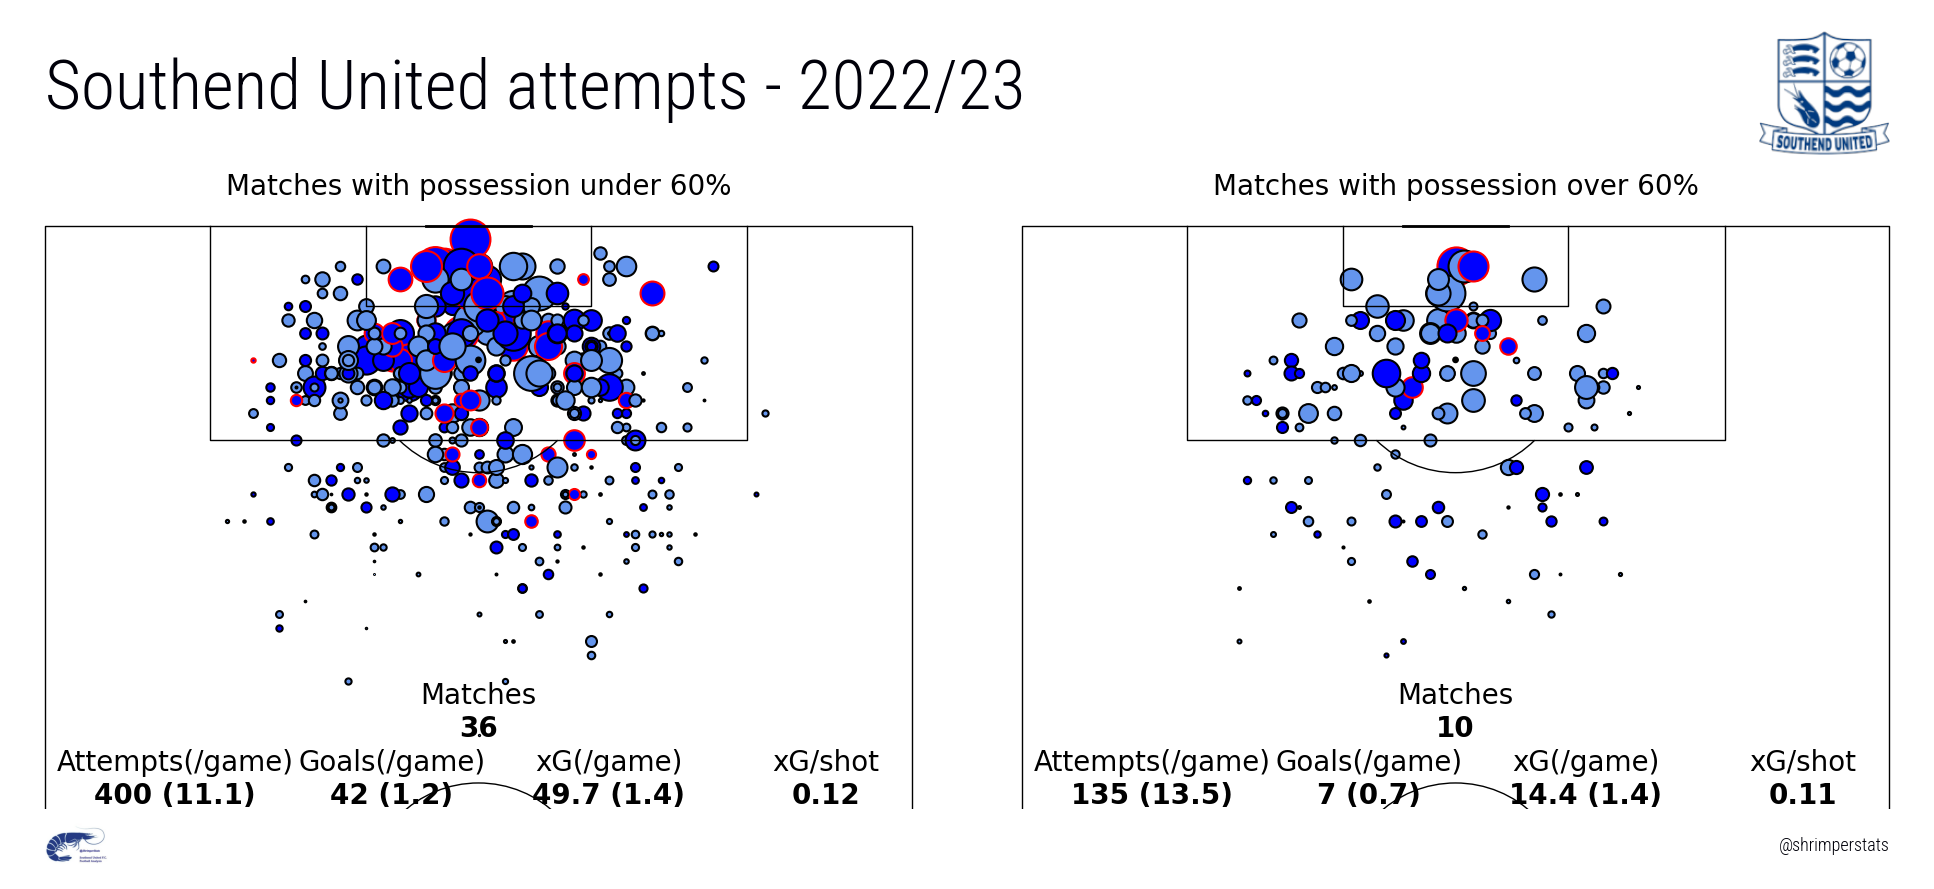

In [12]:
from wyscout.match import get_match_advanced_stats
from wyscout.viz.match import plot_attempts

matches = get_team_matches(team_id=team_id, season_id=SEASON_2022)

matches_1 = []
matches_2 = []

pct = 60

def get_possession(match_id, team_id):
    stats = get_match_advanced_stats(match_id)
    goals = stats["general"][str(team_id)]["goals"]
    possession = stats["possession"][str(team_id)]["possessionPercent"]
    return goals, possession

for m in matches["matches"]:
    try:
        goals, percent = get_possession(m["matchId"], team_id)
        if percent >= pct:
            matches_1.append(m)
        else:
            matches_2.append(m)
    except:
        pass

plot_attempts(
    [matches_2, matches_1],
    # [matches_under_55[0:1], matches_over_55[0:0]],
    team_id,
    fig_height=10,
    shot_colors=("blue", "cornflowerblue"),
    header_text=f"Southend United attempts - 2022/23",
    subtitle_text=[
        f"Matches with possession under {pct}%",
        f"Matches with possession over {pct}%"
    ],
    include_pens=False,
)

/workspaces/sufc_stats/.venv/sufc-stats--ixh6ZGa-py3.11/lib/python3.11/site-packages/mplsoccer/_pitch_plot.py:170: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)
/workspaces/sufc_stats/.venv/sufc-stats--ixh6ZGa-py3.11/lib/python3.11/site-packages/mplsoccer/_pitch_plot.py:170: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)
/workspaces/sufc_stats/.venv/sufc-stats--ixh6ZGa-py3.11/lib/python3.11/site-packages/mplsoccer/_pitch_plot.py:170: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde

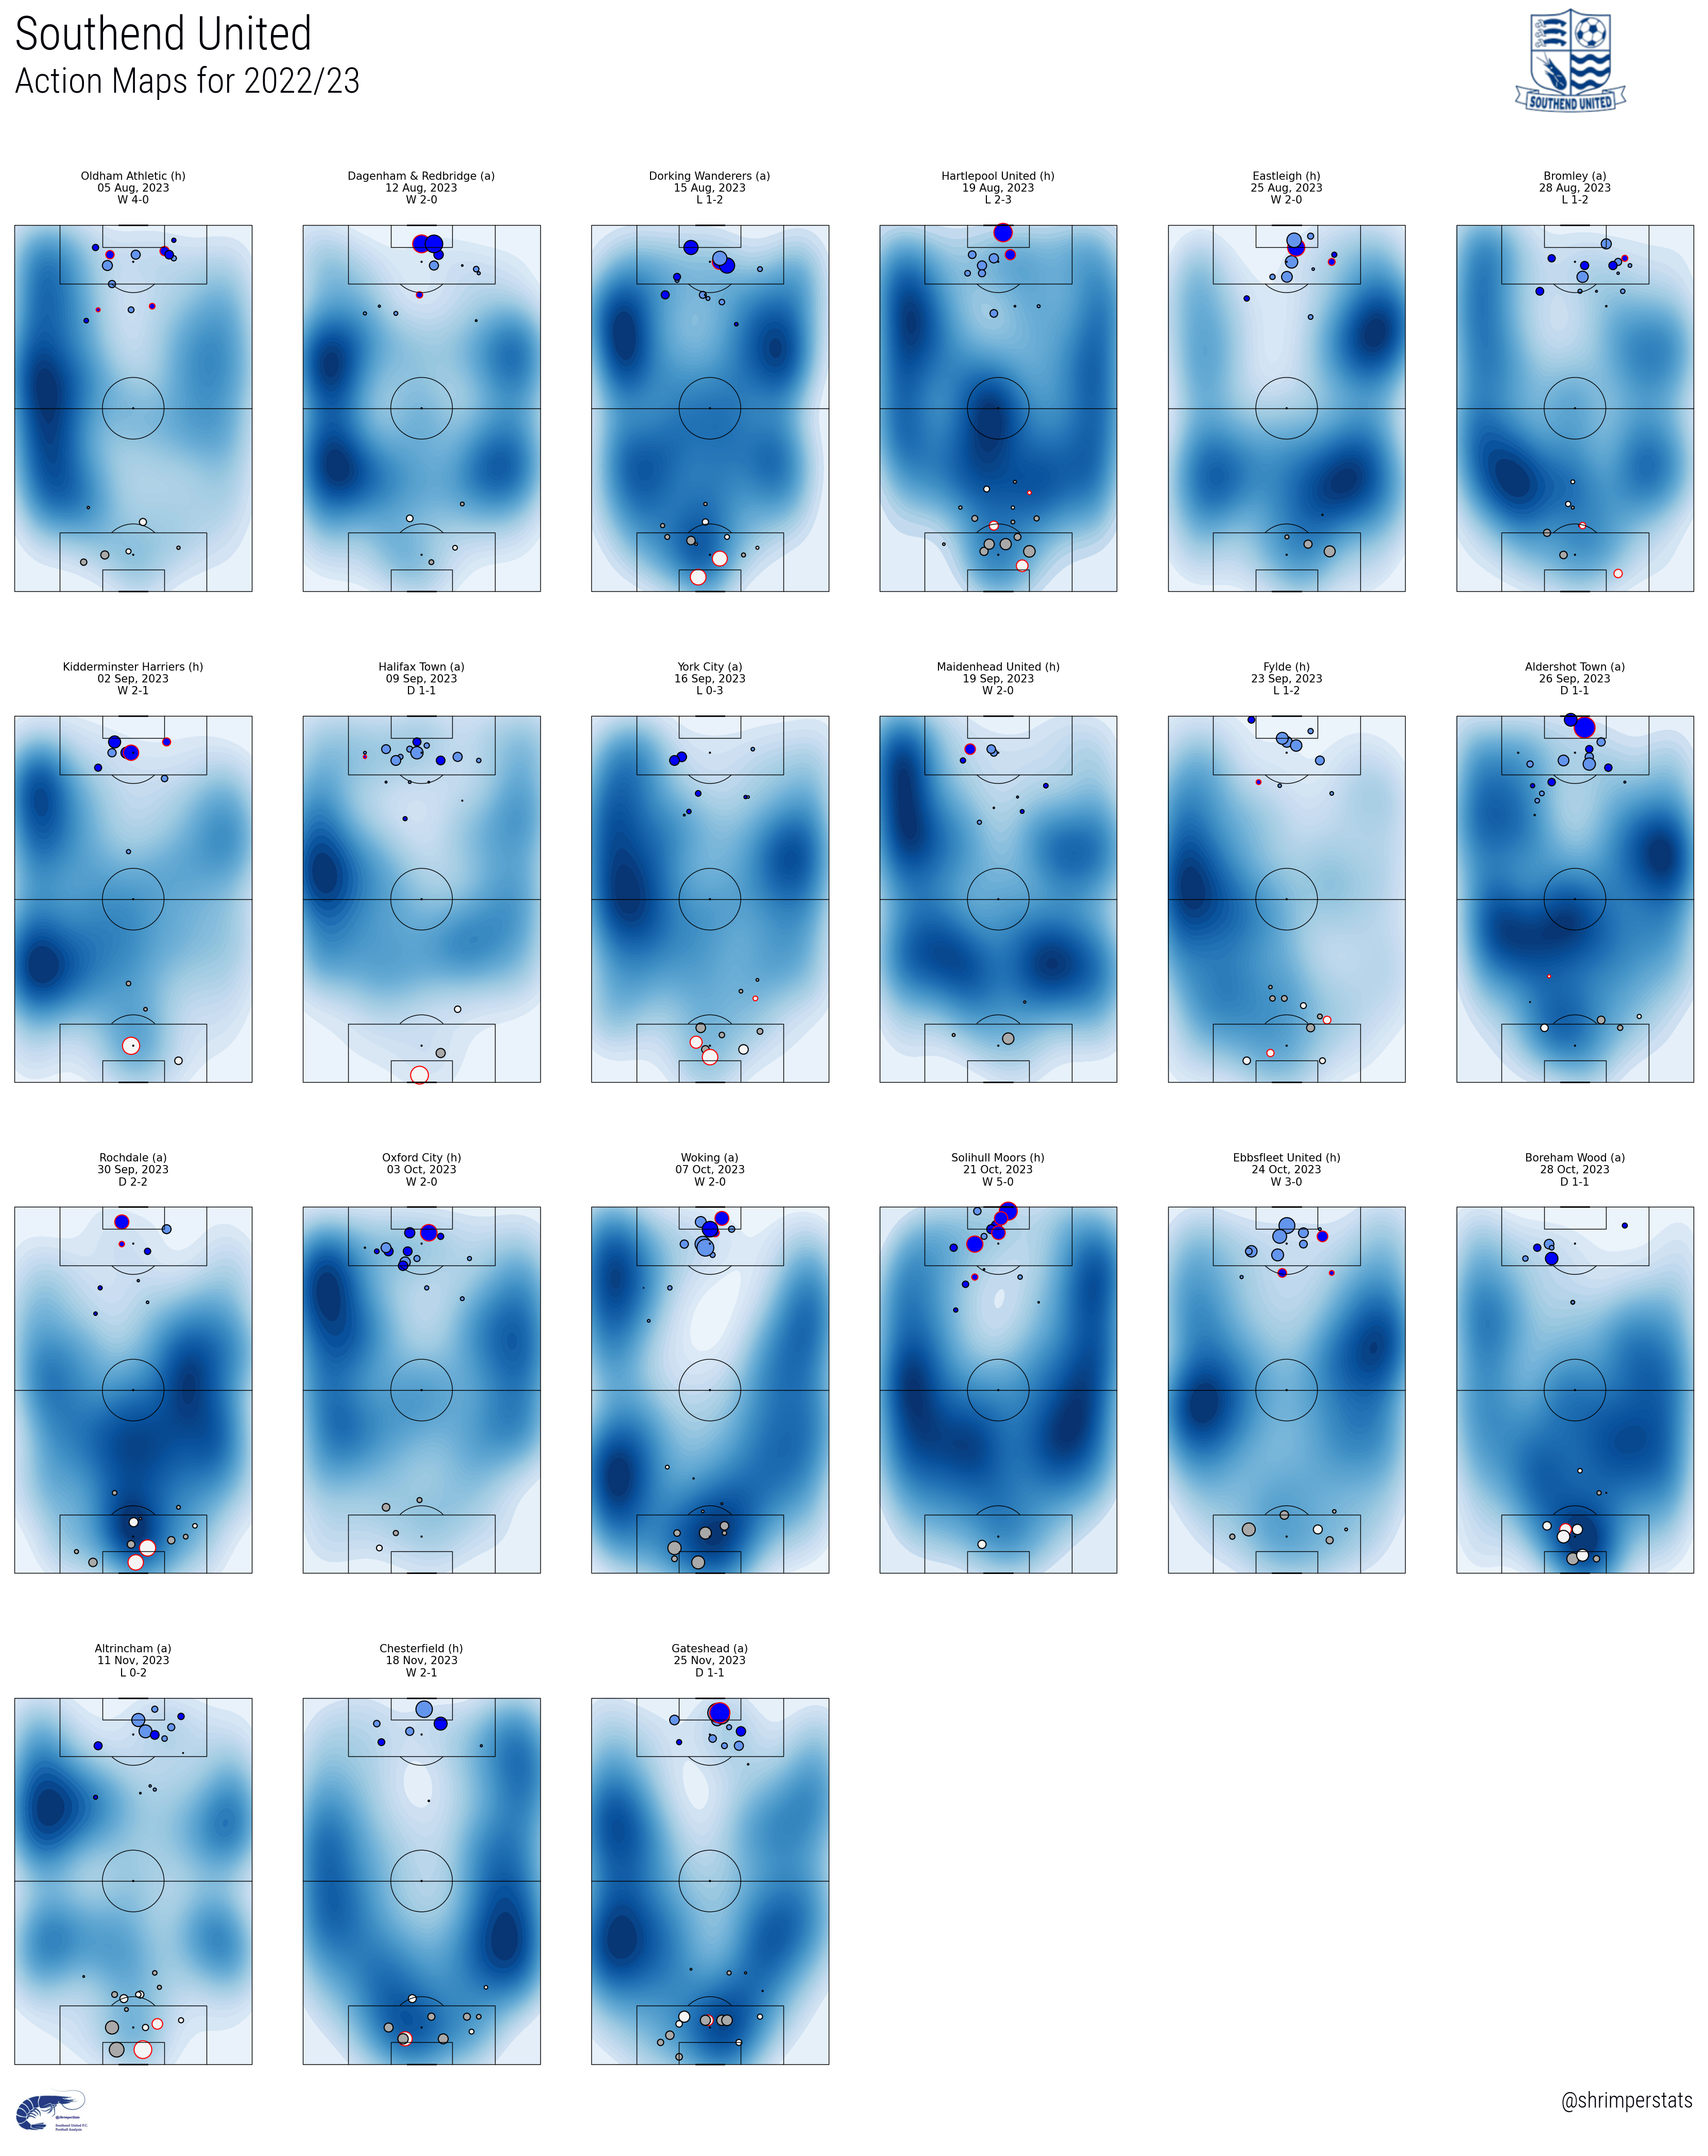

In [14]:
from wyscout.viz.player import plot_team_season_heat_maps
plot_team_season_heat_maps(
    team_id,
    season,
    cols=6,
    fig_height=50,
    cmap="Blues",
    shot_colors=("blue", "cornflowerblue"),
    reversed=True,
)

/workspaces/sufc_stats/.venv/sufc-stats--ixh6ZGa-py3.11/lib/python3.11/site-packages/mplsoccer/_pitch_plot.py:172: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)
/workspaces/sufc_stats/.venv/sufc-stats--ixh6ZGa-py3.11/lib/python3.11/site-packages/mplsoccer/_pitch_plot.py:172: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde_clip, **kwargs)
/workspaces/sufc_stats/.venv/sufc-stats--ixh6ZGa-py3.11/lib/python3.11/site-packages/mplsoccer/_pitch_plot.py:172: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  return sns.kdeplot(x=x, y=y, ax=ax, clip=self.kde

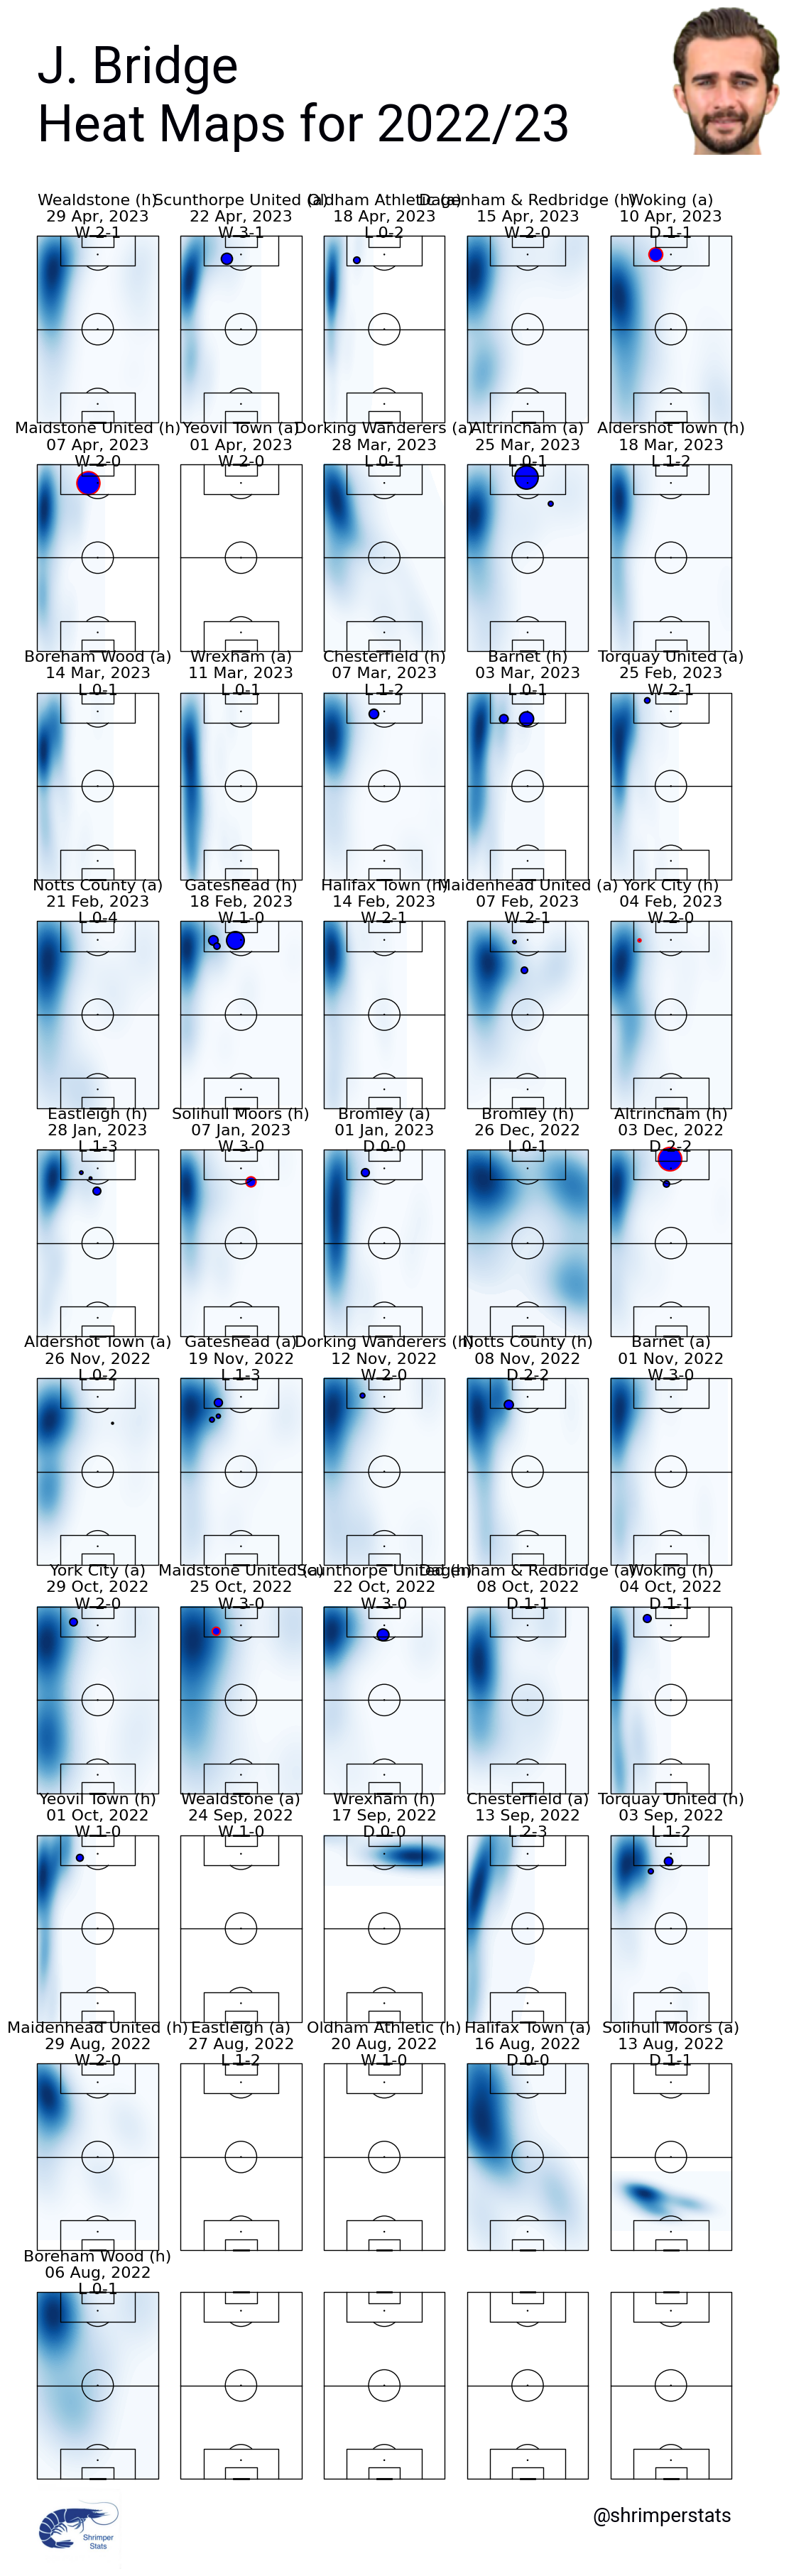

In [7]:
from wyscout.viz.player import plot_player_season_heat_maps


player_id = J_BRIDGE
team_id = SOUTHEND
season = SEASON_2022

plot_player_season_heat_maps(player_id, team_id, season, cols=5, fig_height=40)


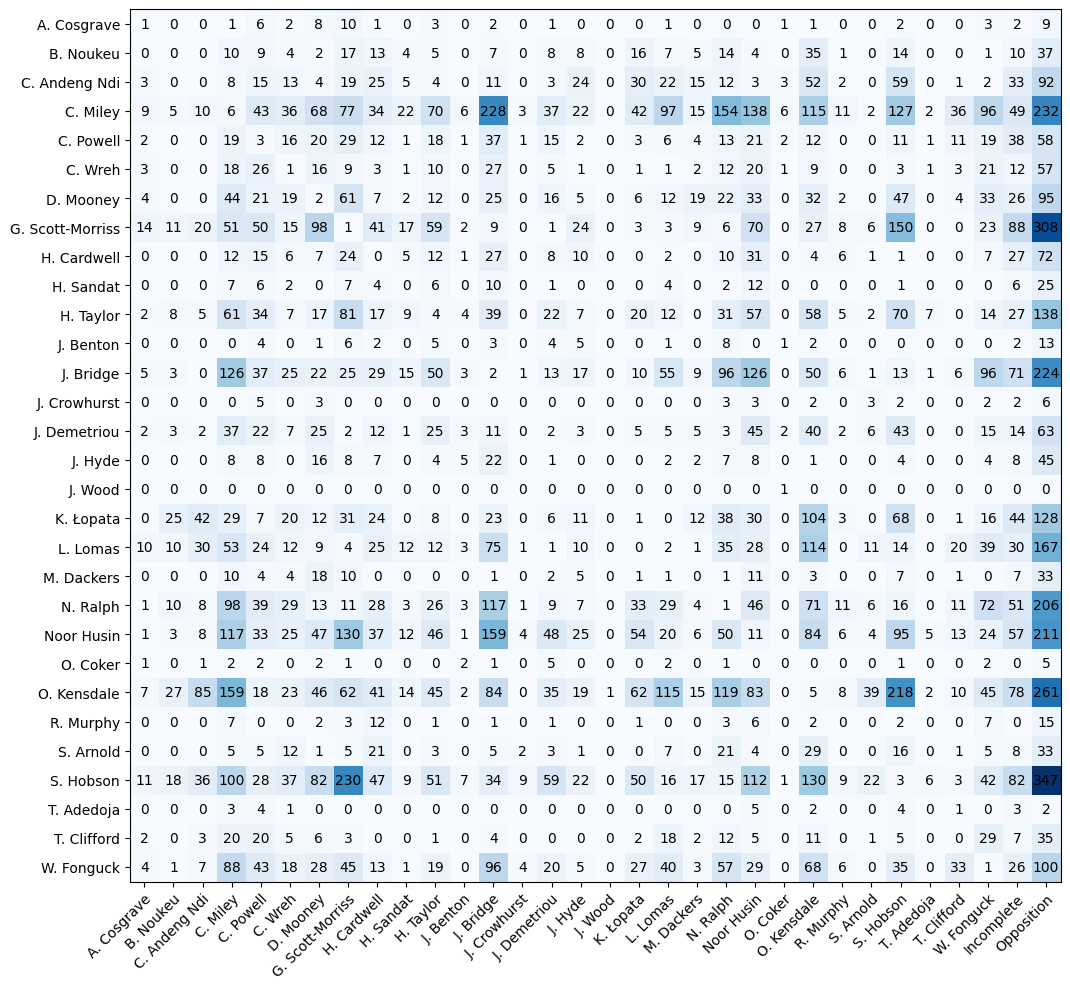

In [8]:
from wyscout.viz.viz import pass_heat_map_for_matches
passes, players = pass_heat_map_for_matches(team_id, [int(m["matchId"]) for m in matches["matches"]])

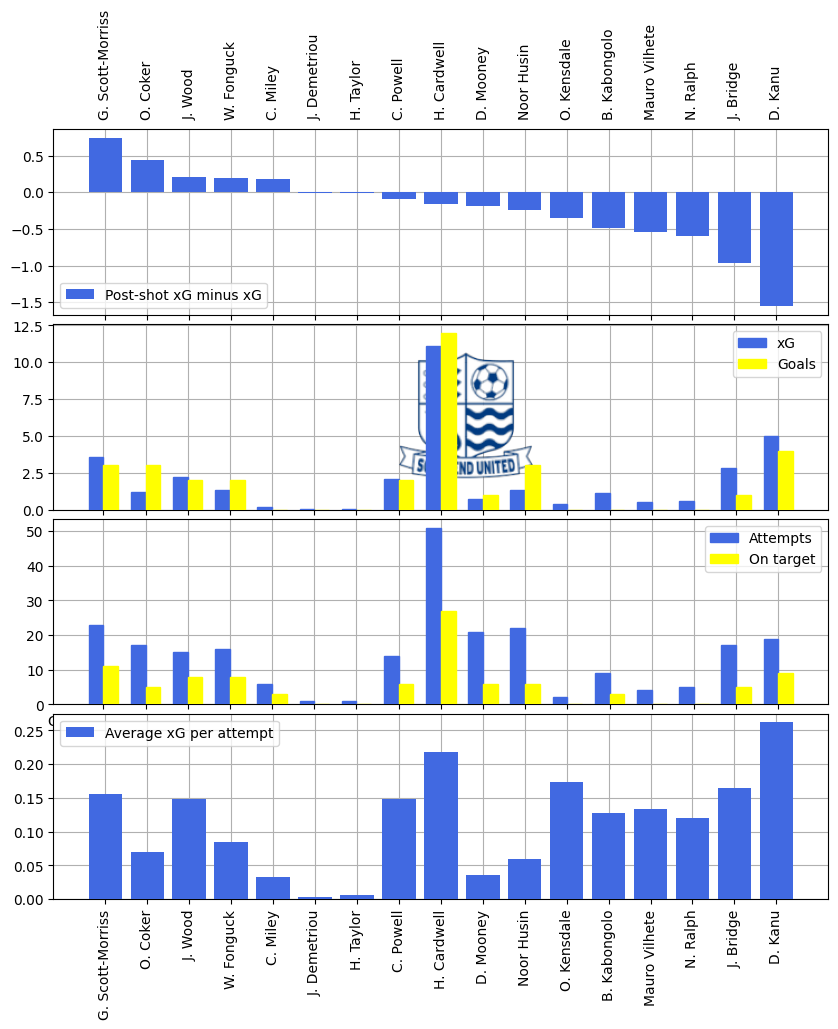

In [15]:
from wyscout.viz.xg import plot_attacking_stats
colors = ["royalblue", "yellow"]
edgecolors = ["royalblue", "yellow"]

plot_attacking_stats(SOUTHEND, SEASON_2023, colors=colors, edgecolors=edgecolors)


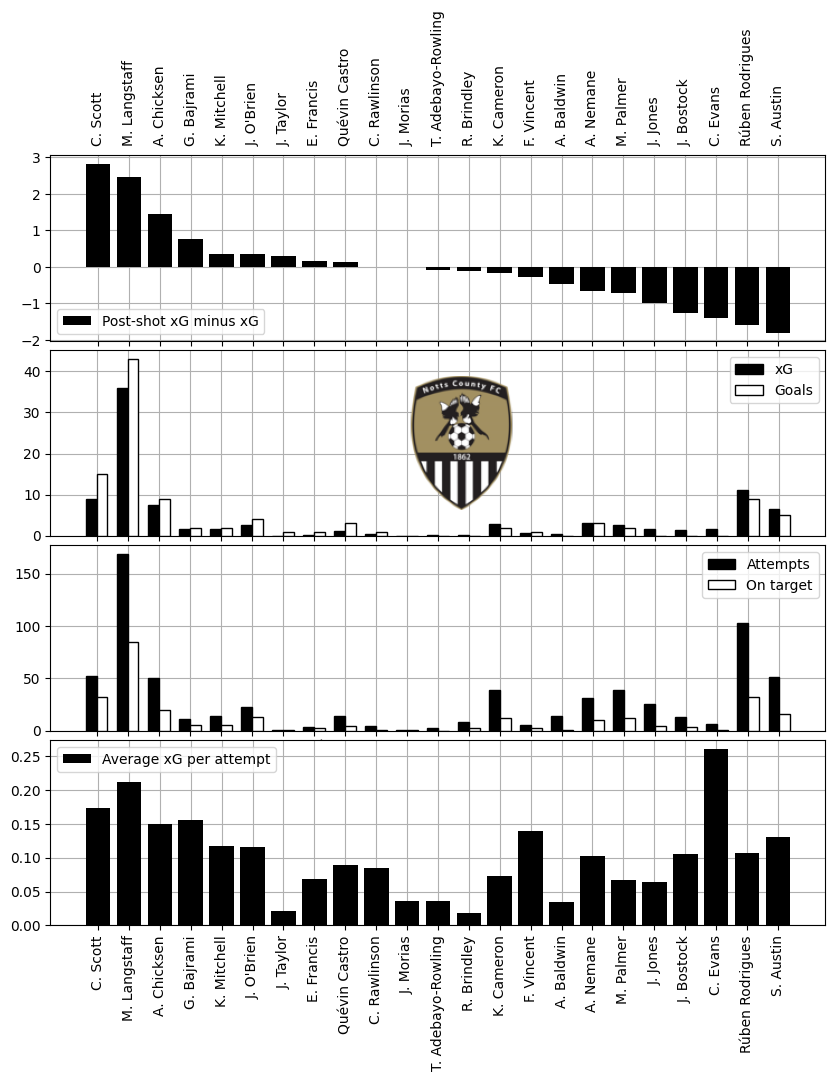

In [10]:
colors = ["black", "white"]
edgecolors = ["black", "black"]

plot_attacking_stats(NOTTS_C, SEASON_2022, colors=colors, edgecolors=edgecolors)


In [11]:
colors = ["red", "white"]
edgecolors = ["red", "red"]

plot_attacking_stats(WREXHAM, SEASON_2022, colors=colors, edgecolors=edgecolors)


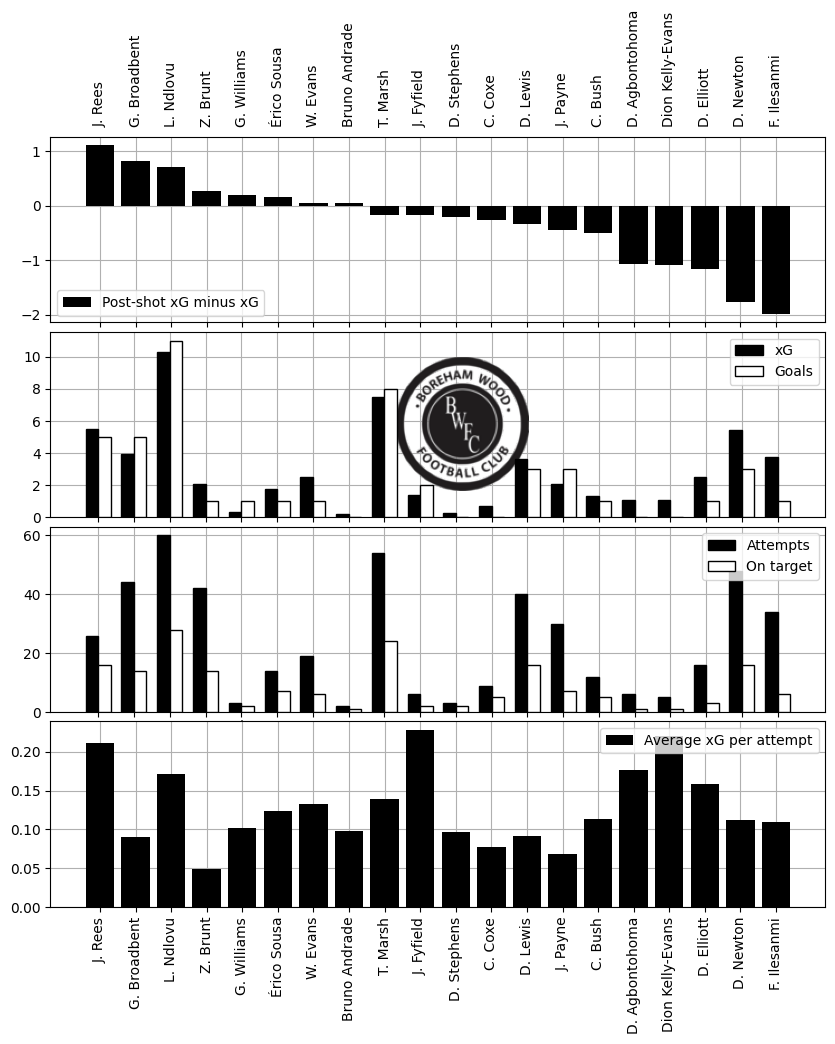

In [ ]:
colors = ["black", "white"]
edgecolors = ["black", "black"]

plot_attacking_stats(BOREHAM_WOOD, SEASON_2022, colors=colors, edgecolors=edgecolors)

In [21]:
all_matches = matches["matches"]
all_matches.reverse()

In [36]:
from wyscout.match import get_match_details_and_events

def get_shot_stats(events: List[Dict[str, Any]]) -> Dict[str, Any]:
    shots = [e for e in events if e["type"]["primary"] == "shot"]
    goals_agg = sum([s["shot"]["isGoal"] for s in shots])
    xg_agg = sum([s["shot"]["xg"] for s in shots])
    return {
        "shots": len(shots),
        "goals": goals_agg,
        "xG": xg_agg
    }

xg_stats = {
    "shots": [],
    "goals": [],
    "xG": [],
    "xg_per_shot": [],
    "rolling_xg_per_shot": [],
    "rolling_5_xg_per_shot": [],
    "result": [],
    "label": []
}

shots_goals = {
    "count": [],
    "type": [],
    "label": []
}
for m in all_matches:
    if (m["status"] != "Played"):
        continue
    match, match_details, squad, team_details = get_match_details_and_events(
        team_id, m["matchId"], False)

    stats = get_shot_stats(match["events"])

    # 0 = loss, 1 = won, 2 = win
    result = 2 if match_details["winner"] == team_id else 0 if match_details["winner"] != 0 else 1

    xg_stats["result"].append(result)
    xg_stats["shots"].append(stats["shots"])
    xg_stats["goals"].append(stats["goals"])
    xg_stats["xG"].append(stats["xG"])
    xg_stats["xg_per_shot"].append(stats["xG"] / stats["shots"])
    xg_stats["rolling_xg_per_shot"].append(sum(xg_stats["xG"]) / sum(xg_stats["shots"]))
    xg_stats["rolling_5_xg_per_shot"].append(sum(xg_stats["xG"][-5:]) / sum(xg_stats["shots"][-5:]))
    xg_stats["label"].append(m["label"])

    shots_goals["count"].append(stats["shots"])
    shots_goals["type"].append("shots")
    shots_goals["label"].append(m["label"])

    shots_goals["count"].append(stats["goals"])
    shots_goals["type"].append("goals")
    shots_goals["label"].append(m["label"])

df = pd.DataFrame(xg_stats)
df_shots_goals = pd.DataFrame(shots_goals)


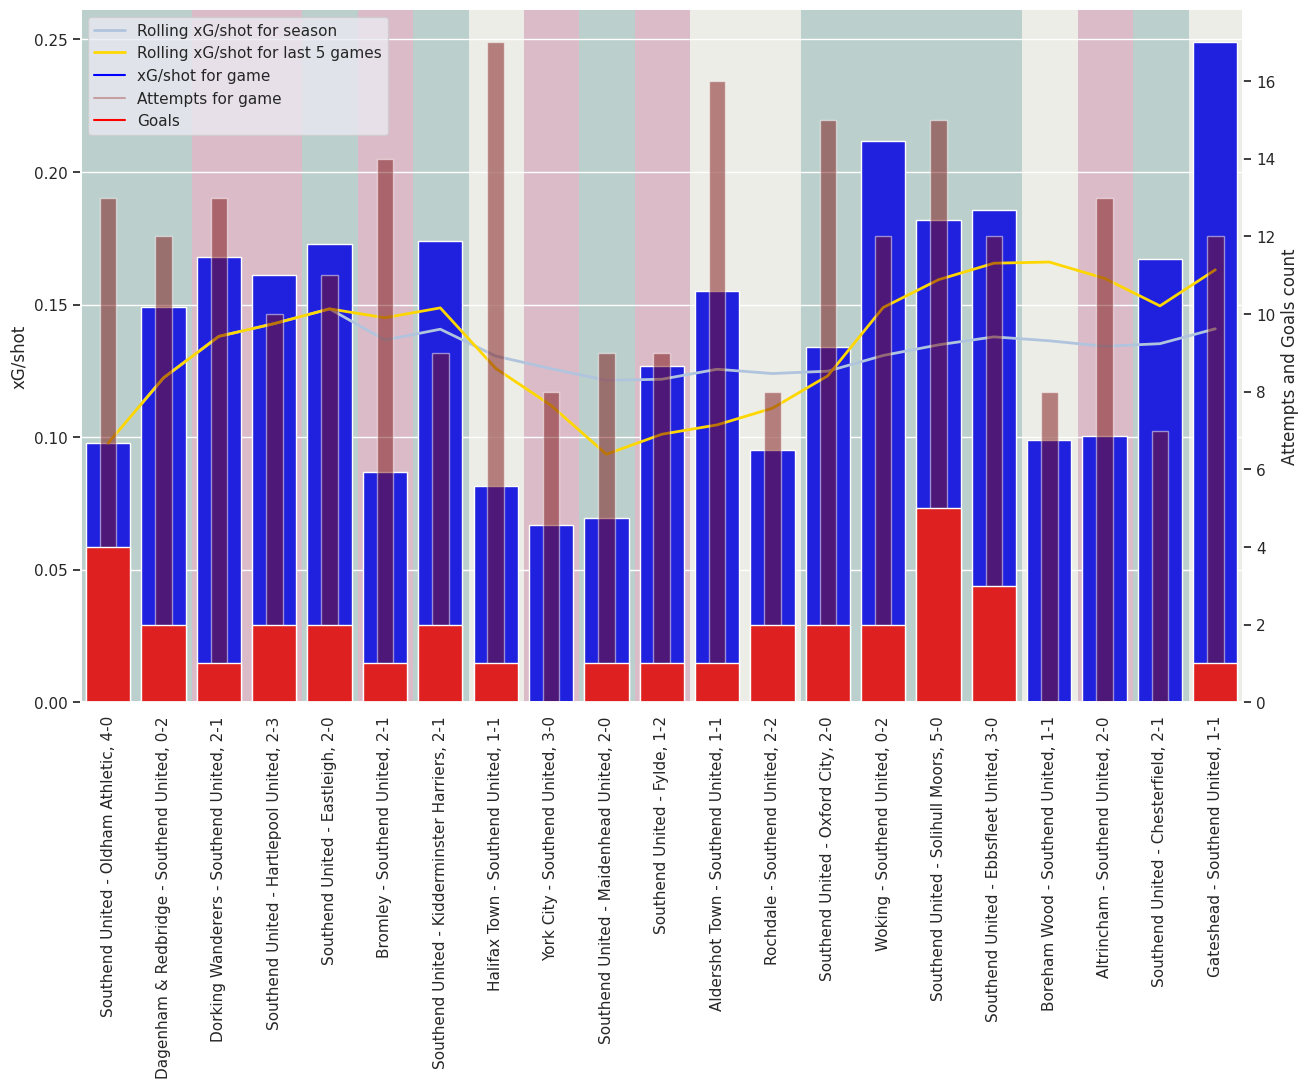

In [37]:
sns.set_theme(style="whitegrid")

sns.set(rc={'figure.figsize':(15,9)})

ax1 = sns.lineplot(
    data=df, y="rolling_xg_per_shot", x="label", palette="dark", color="lightsteelblue", linewidth=2
)

ax1.tick_params(axis='x', rotation=90)


sns.lineplot(
    x='label', 
    y='rolling_5_xg_per_shot', 
    data=df, 
    color='gold',
    linewidth=2,
    ax = ax1
)

sns.barplot(
    x='label', 
    y='xg_per_shot', 
    data=df, 
    color='blue', 
    ax = ax1
)

ax1.set(xlabel=None)
ax1.set(ylabel="xG/shot")

ax2 = ax1.twinx()

sns.barplot(
    data=df, x="label", y="shots", color="darkred", alpha=0.5, width=0.3,
    ax=ax2
)


sns.barplot(
    data=df, x="label", y="goals", color="red",
    ax=ax2
)

ax2.set(ylabel="Attempts and Goals count")
ax2.grid(False)

a = Line2D([], [], color='lightsteelblue', label='Rolling xG/shot for season', linewidth=2)
b = Line2D([], [], color='gold', label='Rolling xG/shot for last 5 games', linewidth=2)
c = Line2D([], [], color='blue', label='xG/shot for game')
d = Line2D([], [], color='darkred', alpha=0.3, label='Attempts for game')
e = Line2D([], [], color='red', label='Goals')
plt.legend(handles=[a, b, c, d, e])


ax1.pcolorfast(ax1.get_xlim(), ax1.get_ylim(),
              df["result"].values[np.newaxis],
              cmap='RdYlGn', alpha=0.2)


In [17]:
from wyscout.match import get_match_details_and_events

def get_shot_stats(events: List[Dict[str, Any]]) -> Dict[str, Any]:
    shots = [e for e in events if e["type"]["primary"] in ["shot", "penalty"]]
    goals_agg = sum([s["shot"]["isGoal"] for s in shots])
    xg_agg = sum([s["shot"]["xg"] for s in shots])
    post_shot_xg_agg = sum([s["shot"]["postShotXg"] or 0 for s in shots])
    return {
        "shots": len(shots),
        "goals": goals_agg,
        "xG": xg_agg,
        "postShotXg": post_shot_xg_agg
    }
   
total_goals = 0
total_xg = 0
total_post_shot_xg = 0

for m in matches["matches"]:
    match, match_details, squad, team_details = get_match_details_and_events(
        team_id, m["matchId"], False)
    
    stats = get_shot_stats(match["events"])

    total_goals += stats["goals"]
    total_xg += stats["xG"]
    total_post_shot_xg += stats["postShotXg"]

    print(f"{m['label']}: {stats['goals']} goals, {stats['xG']} xG, {stats['postShotXg']} post-shot xG")

print(f"Goals: {total_goals}")
print(f"xG: {total_xg}")
print(f"Post-shot xG: {total_post_shot_xg}")


Southend United - Wealdstone, 2-1: 2 goals, 2.2876779999999997 xG, 1.75720753 post-shot xG
Scunthorpe United - Southend United, 1-3: 3 goals, 2.532366 xG, 2.6075999999999997 post-shot xG
Oldham Athletic - Southend United, 2-0: 0 goals, 1.155254 xG, 0.88334 post-shot xG
Southend United - Dagenham & Redbridge, 2-0: 2 goals, 2.403527 xG, 2.7213380000000003 post-shot xG
Woking - Southend United, 1-1: 1 goals, 0.8680019999999999 xG, 0.2036 post-shot xG
Southend United - Maidstone United, 2-0: 2 goals, 1.67348 xG, 1.5286 post-shot xG
Yeovil Town - Southend United, 0-2: 2 goals, 2.051551 xG, 2.40218 post-shot xG
Dorking Wanderers - Southend United, 1-0: 0 goals, 0.9665511000000001 xG, 0.12916 post-shot xG
Altrincham - Southend United, 1-0: 0 goals, 1.5167269999999997 xG, 0.14725 post-shot xG
Southend United - Aldershot Town, 1-2: 1 goals, 0.9394700000000001 xG, 0.49970000000000003 post-shot xG
Boreham Wood - Southend United, 1-0: 0 goals, 1.5210709999999998 xG, 1.3952700000000002 post-shot xG